### Captum Visual Insights for Finetuned AG News Classification  model from the BERT Pretrained Model 

This Notebook helps you to get started with the Captum Insights. In this example, we have finetuned the BERT pre-trained model using feature extraction for AG News classification which classifies the given input in one of the following classes ("world", "Sports", "Business", "Sci/Tech"). We have showcased that how we can visualize the word importances and attributions.We can visualize Captum Insights normally and making a request on torchserve as well as shown  in this notebook

In [11]:
!mlflow deployments predict --name news_classification_test --target torchserve --input-path input.json --output-path bert_prediction_output.json

In [12]:
! cat bert_prediction_output.json

"\"Business\""

In [13]:
!mlflow deployments explain --name news_classification_test --target torchserve --input-path input.json --output-path bert_explanation_output.json

In [14]:
! cat bert_explanation_output.json

"{\n  \"words\": [\n    \"this\",\n    \"year\",\n    \"business\",\n    \"is\",\n    \"good\"\n  ],\n  \"importances\": [\n    -0.8960579875054552,\n    0.32142482393688027,\n    0.03710019222888394,\n    0.16770534834823803,\n    0.2535047483910214\n  ],\n  \"delta\": 0.021069901597269736\n}"

In [15]:
import json
with open("./bert_explanation_output.json", "r") as fp:
    explanations_json = json.load(fp)
explanations_json = json.loads(explanations_json)

explanations_json


{'words': ['this', 'year', 'business', 'is', 'good'],
 'importances': [-0.8960579875054552,
  0.32142482393688027,
  0.03710019222888394,
  0.16770534834823803,
  0.2535047483910214],
 'delta': 0.021069901597269736}

In [16]:
prediction_json = json.loads(open("./bert_prediction_output.json", "r").read())
prediction_json = json.loads(prediction_json)
prediction_json

'Business'

In [17]:
import torch
attributions = explanations_json['importances']
tokens = explanations_json['words']
delta = explanations_json['delta']

attributions = torch.tensor(attributions)
pred_prob = 0.75
pred_class = prediction_json
true_class = "Business"
attr_class ="world"

In [18]:
from captum.attr import visualization
vis_data_records =[]
vis_data_records.append(visualization.VisualizationDataRecord(
                            attributions,
                            pred_prob,
                            pred_class,
                            true_class,
                            attr_class,
                            attributions.sum(),       
                            tokens,
                            delta))

In [19]:
vis = visualization.visualize_text(vis_data_records)

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
Business,Business (0.75),world,-0.12,this year business is good


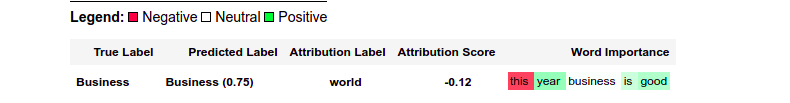

In [20]:
import IPython.display
IPython.display.Image(filename="AGNews_Captum_Insights.png")